In [149]:
import math
import matplotlib.pyplot as plt
from src.signal_generator import SignalGenerator
from src.metrics import Metric
from src.data_type import Measurement
import numpy as np
import cmath
import random


{'original_size': 100, 'compressed_size': 56, 'compression_rate': 0.44}


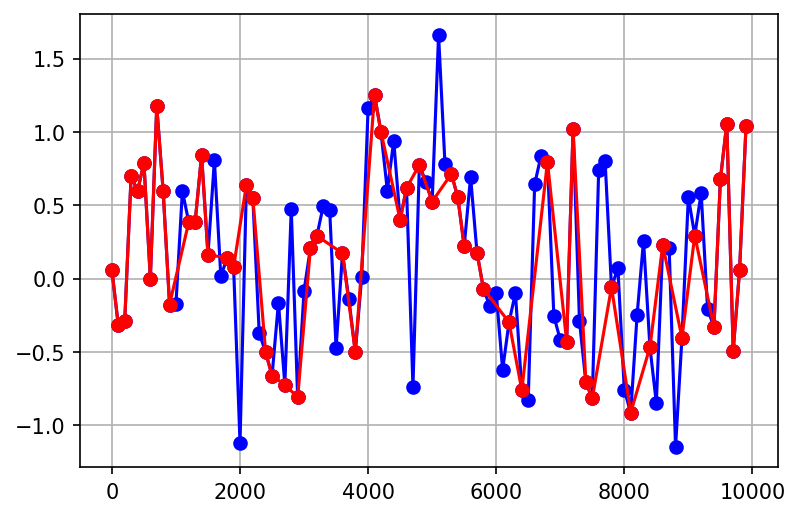

In [196]:
class DataCompressor:
  metric: Metric = Metric()
  original_data: list[Measurement] = []
  compressed_data: list[Measurement] = []

  # paper
  # PLR - Piecewise Linear Representation
  # chapterPLR.pdf pkdd99keogh_pazzani.pdf 

  # paper
  # ZIP - Zigzag-perceptually important point
  # 10.1.1.672.9655.pdf
  def compress_pip_vd(self): 
    # todo
    pass

  # paper
  # SVD - Singular Value Decomposition
  # 10.1.1.121.7455.pdf
  def compress_svd():
    pass

  # paper
  # DWT - Discrete Wavelets Transform
  # wavelet.pdf
  def compress_dwt():
    pass

  # paper
  # PFR - Peak Focus Reduction
  # 10.1.1.462.5253.pdf
  def compress_dft():
    pass

  # paper
  # A-ISR - Adaptable Interzone Sampling Reduction
  # 10.1.1.462.5253.pdf
  def compress_dft():
    pass

  # paper
  # TP - Turning points
  # OBST2013.pdf
  def compress_dft():
    pass

  # paper
  # RWA - Random Walk Algorithm
  # 
  def compress_rwa():
    pass

  # paper
  # MVA - Mean Value Algorithm
  # 
  def compress_mva():
    pass

  # paper
  # HSR - Height Sorting Reduction
  # 
  def compress_hsr():
    pass

  # paper
  # ASR - Angle Sorting Reduction
  # 
  def compress_asr():
    pass

  # paper
  # SWING
  # energies-12-02523-v3.pdf
  def compress_swing():
    pass

  def compress_stc_v2(self):
    # todo
    # nie brać tylko dwóch pod uwagę a dłuższe ramie
    pass

  def compress_random(self):
    # todo
    pass

  def compress_with_density(self):
    # todo
    pass

  def compress_with_corelation(self):
    # todo
    pass

  def compress_minimum_for_metric(self):
    # todo
    pass

  def vizualize(self, show_compressed: bool = True, show_interpolation: bool = False):
    x_original = [measurement.timestamp for measurement in self.original_data]
    y_original = [measurement.value for measurement in self.original_data]
    plt.figure(dpi=150)
    if show_interpolation:
        plt.plot(x_original, y_original, 'b')
    plt.plot(x_original, y_original, 'bo')
    if show_compressed:
      x_compressed = [measurement.timestamp for measurement in self.compressed_data]
      y_compressed = [measurement.value for measurement in self.compressed_data]
      if show_interpolation:
        plt.plot(x_compressed, y_compressed, 'r')
      plt.plot(x_compressed, y_compressed, 'ro')
    plt.grid()
    plt.show()
    return self

  def get_stats(self):
    return {
      'original_size': len(self.original_data),
      'compressed_size': len(self.compressed_data),
      'compression_rate': (len(self.original_data) - len(self.compressed_data)) / len(self.original_data)
    }

  config = {
    
  }

  # custom
  # Pick With Probability
  def compress(self): 
    pass

signal_generator = SignalGenerator(0, 100).with_peaks(3).with_peaks(3, direction=-1).sin(0.2, 0.2).noise()
# signal_generator = SignalGenerator(0, 200).sin(2, 0.2)
data_compressor = DataCompressor()
data_compressor.original_data = [Measurement(measurement, index * 100) for index, measurement in enumerate(signal_generator.data)]
data_compressor.compress()
print(data_compressor.get_stats())
data_compressor.vizualize(True, True)

c:\Users\mleko\Documents\studia\magisterka\sandbox\venv\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\mleko\Documents\studia\magisterka\sandbox\venv\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


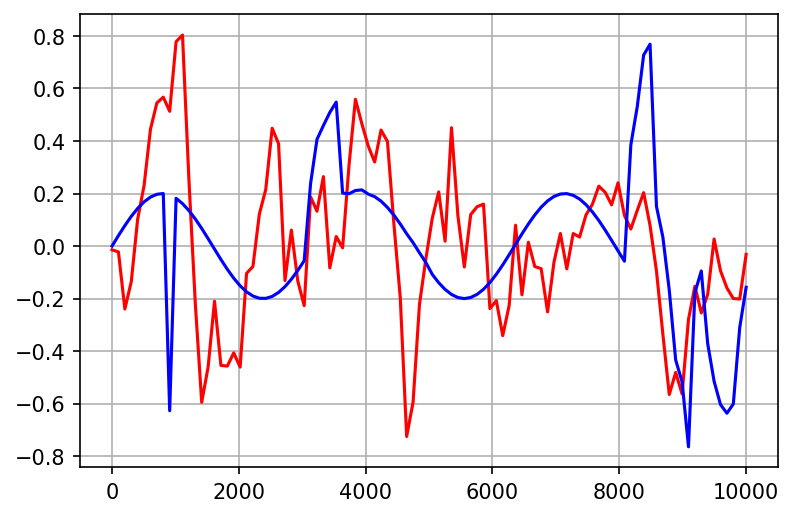

In [144]:
plt.figure(dpi=150)

def _dft(data):
  N = len(data)
  X = [0 for _ in range(N)]
  for m in range(N):    
    for n in range(N): 
      X[m] += data[n] * cmath.exp(-np.pi * 2j * m * n / N)
  return X

def _fft(x):
  N = len(x)
  if N <= 1: 
    return x
  even = _fft(x[0::2])
  odd = _fft(x[1::2])
  T = []
  for k in range(N//2):
    currnet_value = odd[k] if k < len(odd) else 0
    T.append(cmath.exp(2j*np.pi*k/N)* currnet_value)
  part_a = []
  part_b = []
  for k in range(N//2):
    currnet_value = even[k] if k < len(even) else 0
    part_a.append(T[k] + currnet_value)
    part_b.append(T[k] - currnet_value)
  return part_a + part_b

# frequencies = _get_main_frequencies(np.fft.fft(signal_generator.data))
# frequencies = np.fft.fft(signal_generator.data)[:50]
# for frequency, amplitude in frequencies:
#   # data = [amplitude * math.sin(2 * np.pi * x * frequency) for x in np.linspace(0, 10000, 100)]
#   data = [amplitude * cmath.exp(2j * np.pi * x * frequency) for x in np.linspace(0, 10000, 100)]
#   for index, value in enumerate(data):
#     mleko[index] += value

frequencies = _fft(signal_generator.data)
mleko = [0 for _ in range(100)]
for n in range(100):
  for m in range(100):
    mleko[n] += 2 * frequencies[m] * cmath.exp(2j * np.pi * n * m / 100)
mleko = [i / 100 for i in mleko]
plt.plot(np.linspace(0, 10000, 100), mleko, 'r')

# frequencies = _get_main_frequencies(_dft(signal_generator.data))
# mleko = [0 for _ in range(100)]
# for n in range(100):
#   for frequency, amplitude in frequencies:
#     mleko[n] += 2 * amplitude * cmath.exp(2j * np.pi * n * frequency / 100)
# mleko = [i / 100 for i in mleko]
# plt.plot(np.linspace(0, 10000, 100), mleko, 'r')

# plt.plot(np.linspace(0, 10000, 100), np.fft.ifft(np.fft.fft(signal_generator.data)[:50] + [0 for _ in range(50)]), 'b')
plt.plot(np.linspace(0, 10000, 100), np.fft.ifft(np.fft.fft(signal_generator.data)), 'b')
# plt.plot(np.linspace(0, 10000, 100), signal_generator.data, 'g')
plt.grid()
plt.show()

In [ ]:
import unittest
from tests_.basic import *

unittest.main(argv=[''], verbosity=2, exit=False)

test_isupper (tests_.basic.TestStringMethods) ... ok
test_split (tests_.basic.TestStringMethods) ... ok
test_upper (tests_.basic.TestStringMethods) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK
